In [19]:
if 0:
    !nvidia-smi
    
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book
    
    from google.colab import drive
    drive.mount('content/drive')

In [1]:
%matplotlib inline

In [2]:
from fastai.vision.all import *
from fastai.vision.gan import *

# LSun bedroom data

In [3]:
path = untar_data(URLs.LSUN_BEDROOMS)

In [10]:
dblock = DataBlock(
    blocks = (TransformBlock, ImageBlock),
    get_x = generate_noise,
    get_items = get_image_files,
    splitter = IndexSplitter([])
)

In [11]:
def get_dls(bs, size):
    dblock = DataBlock(
        blocks = (TransformBlock, ImageBlock),
        get_items = get_image_files,
        get_x = generate_noise,
        splitter = IndexSplitter([]),
        item_tfms = Resize(size, method=ResizeMethod.Crop),
        batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5]))
    )
    return dblock.dataloaders(path, path=path, bs=bs)

In [12]:
dls = get_dls(128, 64)

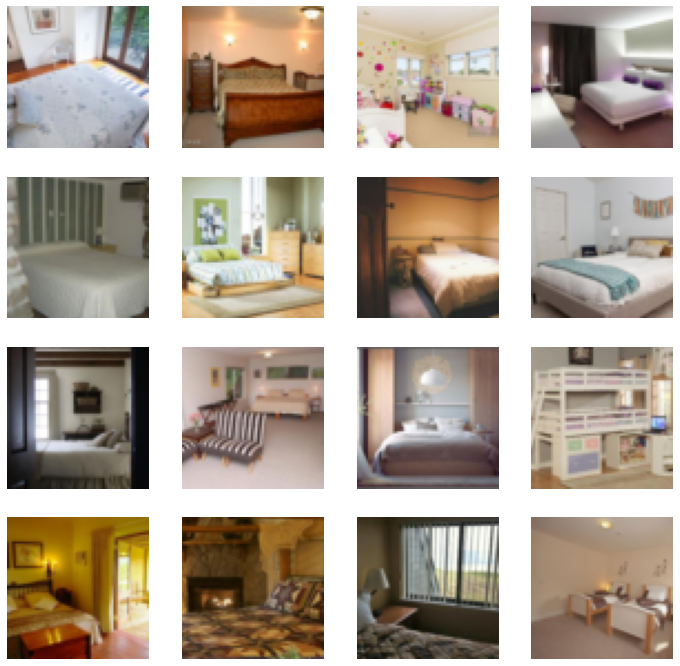

In [13]:
dls.show_batch(max_n=16)

# Models

In [14]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic = basic_critic(64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [15]:
learn = GANLearner.wgan(dls, generator, critic, opt_func=partial(Adam, mom=0.))

In [16]:
learn.recorder.train_metrics = True
learn.recorder.valid_metrics = False

In [17]:
learn.fit(10, 2e-4, wd=0)

/home/sandmann/anaconda3/envs/fastbook/lib/python3.8/site-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/sandmann/anaconda3/envs/fastbook/lib/python3.8/site-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/sandmann/anaconda3/envs/fastbook/lib/python3.8/site-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this

epoch,train_loss,gen_loss,crit_loss,time
0,-0.807047,0.629363,-1.124508,05:58
1,-0.670047,0.573254,-1.023296,05:55
2,-0.625391,0.505379,-0.903848,05:56


/home/sandmann/anaconda3/envs/fastbook/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


KeyboardInterrupt: 